In [33]:
import sys
import pandas as pd



from datetime import datetime
print(sys.version)

pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 20)

3.7.7 (tags/v3.7.7:d7c567b08f, Mar 10 2020, 10:41:24) [MSC v.1900 64 bit (AMD64)]


In [ ]:
'''
File cleanup code 
Only to be run once
'''

import csv

for file in ["Wednesday-14-02-2018_TrafficForML_CICFlowMeter.csv","Wednesday-21-02-2018_TrafficForML_CICFlowMeter.csv","Wednesday-28-02-2018_TrafficForML_CICFlowMeter.csv","Thursday-01-03-2018_TrafficForML_CICFlowMeter.csv","Thursday-15-02-2018_TrafficForML_CICFlowMeter.csv","Thursday-22-02-2018_TrafficForML_CICFlowMeter.csv","Friday-02-03-2018_TrafficForML_CICFlowMeter.csv","Friday-16-02-2018_TrafficForML_CICFlowMeter.csv","Friday-23-02-2018_TrafficForML_CICFlowMeter.csv"]:
    output_filepath="cleaned_files/" + file
    with open(file,"r") as inputfile, open(output_filepath,"w",newline="") as outputfile:
        csv_in = csv.reader(inputfile)
        csv_out = csv.writer(outputfile)
        title = next(csv_in)
        csv_out.writerow(title)
        for row in csv_in:
            if row != title:
                 csv_out.writerow(row)

In [34]:
flow_df = pd.read_csv('cleaned_files/Wednesday-14-02-2018_TrafficForML_CICFlowMeter.csv')

flow_df.count()

Dst Port         1048575
Protocol         1048575
Timestamp        1048575
Flow Duration    1048575
Tot Fwd Pkts     1048575
                  ...   
Idle Mean        1048575
Idle Std         1048575
Idle Max         1048575
Idle Min         1048575
Label            1048575
Length: 80, dtype: int64

In [35]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, mutual_info_classif

feature_cols = ['Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
       'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Fwd Byts/b Avg',
       'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg',
       'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg', 'Subflow Fwd Pkts',
       'Subflow Fwd Byts', 'Subflow Bwd Pkts', 'Subflow Bwd Byts',
       'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts',
       'Fwd Seg Size Min', 'Active Mean', 'Active Std', 'Active Max',
       'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min']

exlcuded_cols = ['Dst Port', 'Protocol', 'Flow Byts/s','Flow Pkts/s','Timestamp']


X = flow_df[feature_cols]


y = flow_df['Label']

'''
Feature selection using f_classif
'''
X = SelectKBest(f_classif, k=5).fit_transform(X, y)


'''
Feature scaler - MinMax
'''
scaler = MinMaxScaler()
scaler.fit(X)
X_norm = scaler.transform(X)

c:\users\prashant\appdata\local\programs\python\python37\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: UserWarning: Features [28 29 30 46 52 53 54 55 56 57] are constant.
  UserWarning)
c:\users\prashant\appdata\local\programs\python\python37\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [36]:
import dask
import dask.dataframe as dd
from dask.distributed import Client, progress
import dask.array as da
from dask.diagnostics import Profiler, ResourceProfiler, CacheProfiler

#!pip3.7 install dask_ml

try:
    if client is not None:
        client.close()
        print("closed existing connection, ",client)       
except Exception as e:
    print(e)

    
client = Client(n_workers=2, threads_per_worker=2, memory_limit='8GB')
display(client)

closed existing connection,  <Client: not connected>


Client Scheduler: tcp://127.0.0.1:52008 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 2 Cores: 4 Memory: 16.00 GB


In [37]:
from sklearn.model_selection import train_test_split


flow_df_norm = pd.DataFrame(X)

flow_df_norm.head()
X_train, X_test, y_train, y_test = train_test_split(flow_df_norm, y, test_size=0.2, random_state =42, shuffle=True)

In [38]:
'''
Oversampler for dealing with imbalanced sets
'''
from imblearn.over_sampling import SMOTE

oversampler = SMOTE()
X_train, y_train = oversampler.fit_resample(X_train, y_train)

In [39]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train, y_train)

GaussianNB()

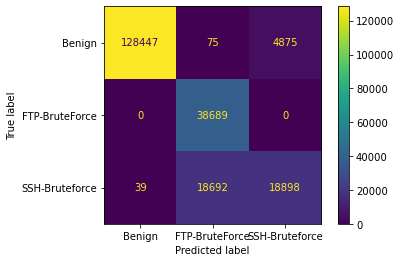

In [40]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(gnb, X_test, y_test)

In [41]:
from sklearn.metrics import precision_score, recall_score
import numpy as np

y_pred = gnb.predict(X_test)

pred = pd.DataFrame([0 if d == 'Benign' else 1 for d in y_pred], columns=["obs"])
test = pd.DataFrame([0 if d == 'Benign' else 1 for d in y_test], columns=["obs"])

pred["obs"] = pd.to_numeric(pred["obs"])
test["obs"] = pd.to_numeric(test["obs"])


precision_score(test, pred)
recall_score(test, pred)

0.9994889803191908

In [42]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

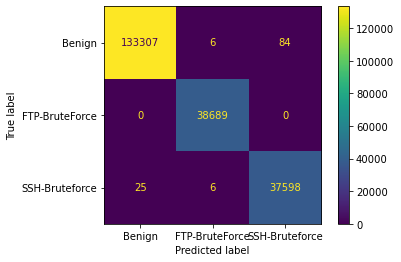

In [43]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(neigh, X_test, y_test)

In [ ]:
from sklearn.metrics import precision_score, recall_score
import numpy as np

y_pred = neigh.predict(X_test)

pred = pd.DataFrame([0 if d == 'Benign' else 1 for d in y_pred], columns=["obs"])
test = pd.DataFrame([0 if d == 'Benign' else 1 for d in y_test], columns=["obs"])

pred["obs"] = pd.to_numeric(pred["obs"])
test["obs"] = pd.to_numeric(test["obs"])


precision_score(test, pred)
recall_score(test, pred)

In [ ]:
from sklearn.neural_network import MLPClassifier


mlp = MLPClassifier(max_iter=50, alpha=1e-4, learning_rate_init=.1, hidden_layer_sizes=(100, 20))

In [ ]:
mlp.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score

pred = mlp.predict(X_test)

accuracy_score(y_test, pred)

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(mlp, X_test, y_test)